## -> Davies Bouldin Method Araştırılıp Uygulanacak

Model değerlendirmesi, makine öğrenimi sürecinin önemli bir parçasıdır. Makine öğreniminde kümelemeyi değerlendirmeye gelince, küme sayısını optimize etmek kritik bir bileşendir. Davies-Bouldin Endeksi, aynı şeyi gerçekleştirmek için iyi bilinen bir ölçümdür - çiftler halinde en benzer kümeler arasındaki ortalama benzerliği karşılaştırarak kümeleme kalitesini değerlendirmeyi sağlar.


#### Davies-Bouldin Endeksi
Davies-Bouldin Endeksi, kümeleme modellerini değerlendirmek için kullanılan bir doğrulama metriğidir. Her kümenin, kendisine en çok benzeyen kümeyle olan ortalama benzerlik ölçüsü olarak hesaplanır. Bu bağlamda benzerlik, kümeler arası ve küme içi mesafeler arasındaki oran olarak tanımlanır. Bu nedenle, bu endeks daha az dağılıma sahip iyi ayrılmış kümeleri daha iyi bir puana sahip olarak sıralar.

**Daha düşük endeks değerleri daha iyi bir kümeleme sonucunu gösterir. Endeks, kümeler arasındaki artan ayrım ve kümeler içindeki azalan varyasyon ile iyileştirilir (düşürülür).**

Bu koşullar, tanımlanan endeksin simetrik ve negatif olmayan olmasını kısıtlar. Küme içi dağılımın kümeler arası ayrımına oranının bir fonksiyonu olarak tanımlanma şekli nedeniyle, daha düşük bir değer kümelemenin daha iyi olduğu anlamına gelir. Bu, her küme ile en çok benzeyeni arasındaki ortalama benzerliktir ve tüm kümeler üzerinden ortalaması alınır; burada benzerlik yukarıda S i olarak tanımlanır . Bu, hiçbir kümenin diğerine benzemek zorunda olmadığı fikrini doğrular ve dolayısıyla en iyi kümeleme şeması esasen Davies-Bouldin endeksini en aza indirir. Bu şekilde tanımlanan bu endeks, tüm i kümeleri üzerinden bir ortalamadır ve dolayısıyla verilerde gerçekte kaç kümenin var olduğuna karar vermenin iyi bir ölçüsü, onu hesaplandığı küme sayısına göre çizmektir. Bu değerin en düşük olduğu i sayısı , verilerin ideal olarak sınıflandırılabileceği küme sayısının iyi bir ölçüsüdür. Bunun , k değerinin önceden bilinmediği kmeans algoritmasında k değerine karar vermede uygulamaları vardır.

***Davies-Bouldin endeksi diğer kümeleme değerlendirme ölçütlerine kıyasla çok etkilidir***

Çünkü;

•Esnektir ve herhangi sayıda küme için çalışır.

•Silhouette Puanı değerlendirme metriğinin aksine, kümelerin şekli hakkında herhangi bir varsayımda bulunmaz.

•Kullanımı kolay ve sezgiseldir.

##### ders uyguladığımız aynı csv üzerinden değerlendirelim ve grafikle en iyi skoru bulalım.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [8]:
df = pd.read_csv("Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [9]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [10]:
db_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    score = davies_bouldin_score(X, labels)
    db_scores.append(score)

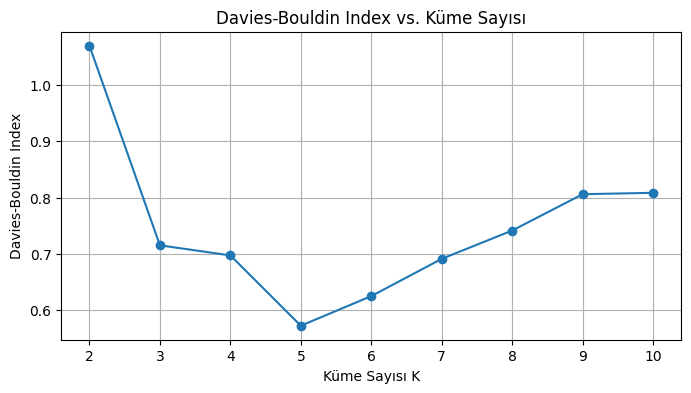

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs. Küme Sayısı')
plt.xlabel('Küme Sayısı K')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

In [20]:
best_k = k_values[np.argmin(db_scores)]
print(f"En iyi Davies-Bouldin Index için ideal küme sayısı: {best_k}")

En iyi Davies-Bouldin Index için ideal küme sayısı: 5
